Dataset Shape: (200, 5)

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   49                  68                      69
1           2  Female   56                  22                      47
2           3    Male   66                  41                      94
3           4    Male   69                  41                      62
4           5    Male   49                 112                      69

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int32 
 3   Annual Income (k$)      200 non-null    int32 
 4   Spending Score (1-100)  200 non-null    int32 
dtypes: int32(3), int64(1), object(1)
memory usage: 

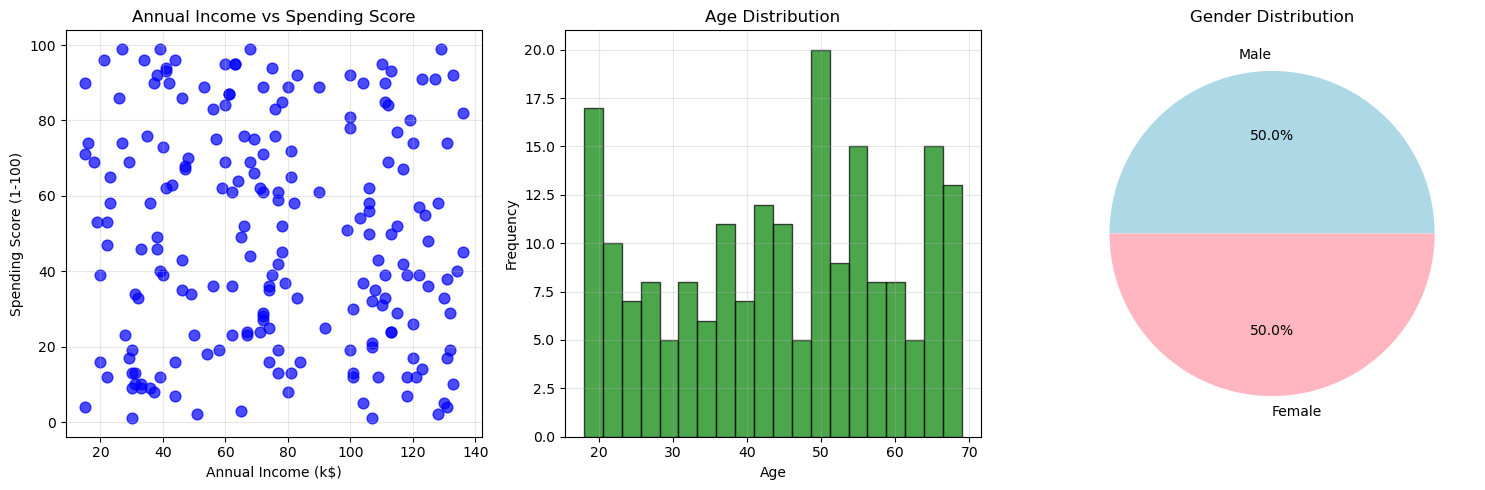


Features selected for clustering:
   Annual Income (k$)  Spending Score (1-100)
0                  68                      69
1                  22                      47
2                  41                      94
3                  41                      62
4                 112                      69

Feature statistics after scaling:
Mean: [-1.59872116e-16  6.43929354e-17]
Standard deviation: [1. 1.]


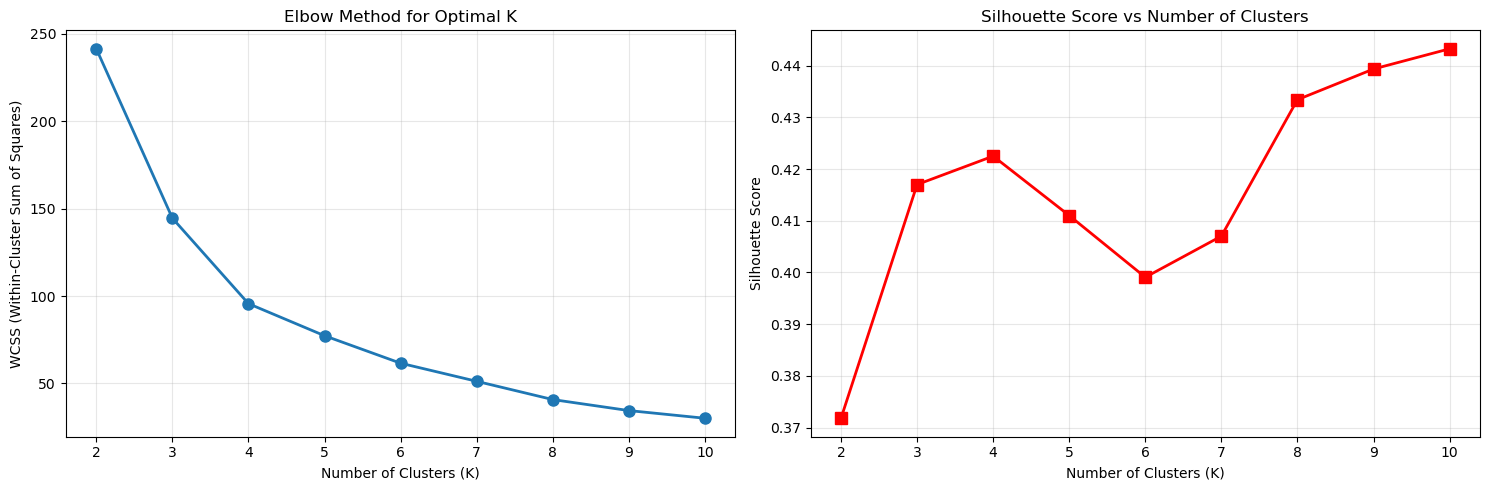

K=2: Silhouette Score = 0.372
K=3: Silhouette Score = 0.417
K=4: Silhouette Score = 0.422
K=5: Silhouette Score = 0.411
K=6: Silhouette Score = 0.399
K=7: Silhouette Score = 0.407
K=8: Silhouette Score = 0.433
K=9: Silhouette Score = 0.439
K=10: Silhouette Score = 0.443

Clustering completed with K=5
Cluster centers (original scale):
   Annual Income (k$)  Spending Score (1-100)
0          117.390244               24.243902
1           49.636364               79.363636
2           34.057143               24.057143
3          108.000000               72.923077
4           72.666667               29.033333

Cluster distribution:
Cluster
0    41
1    55
2    35
3    39
4    30
Name: count, dtype: int64


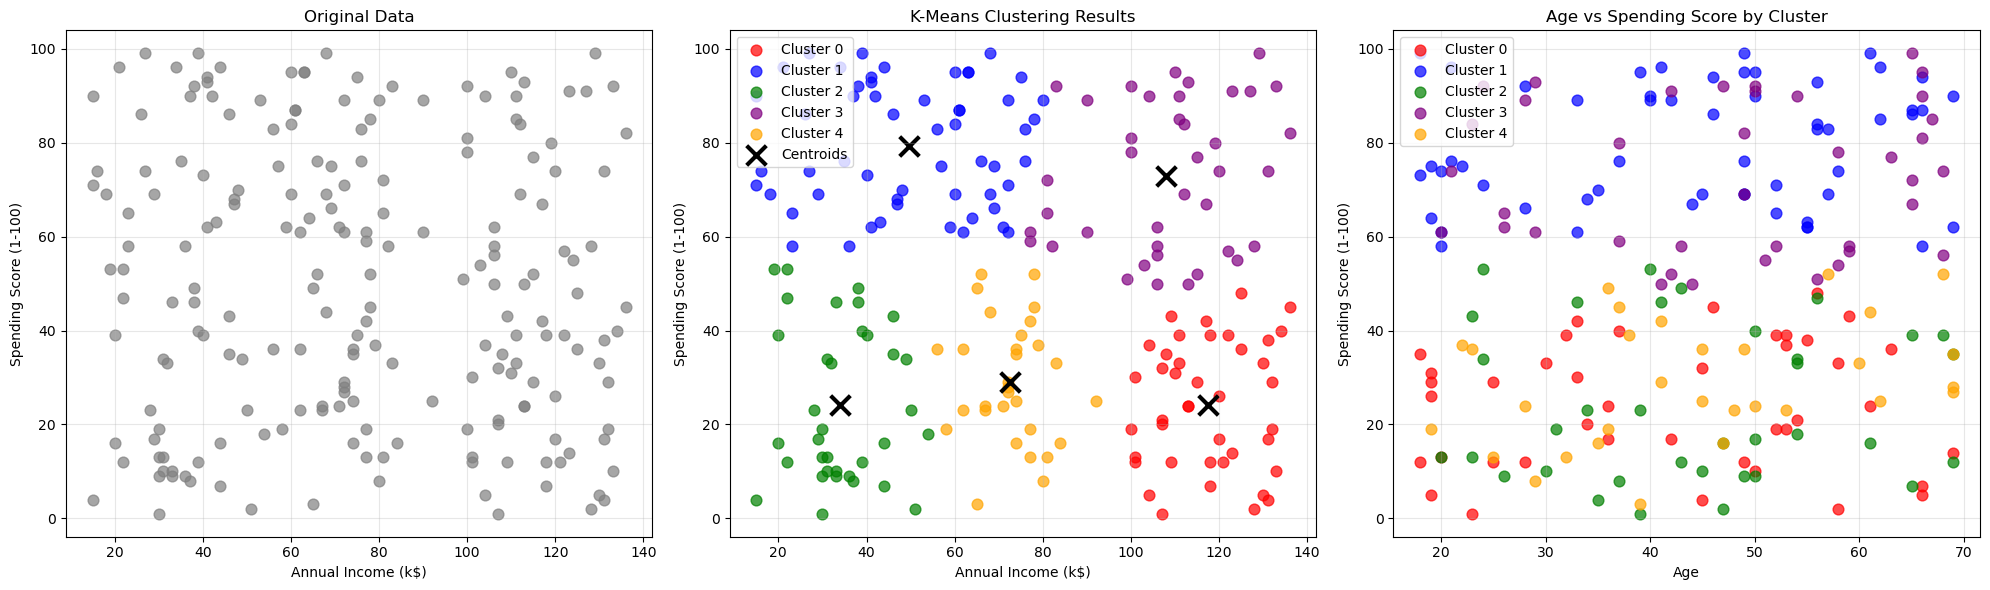


Final Silhouette Score: 0.411
Good clustering structure

Cluster Analysis:

Cluster 0 (41 customers):
  Average Age: 41.7
  Average Annual Income: $117.4k
  Average Spending Score: 24.2
  Gender distribution: {'Male': 21, 'Female': 20}

Cluster 1 (55 customers):
  Average Age: 44.3
  Average Annual Income: $49.6k
  Average Spending Score: 79.4
  Gender distribution: {'Female': 29, 'Male': 26}

Cluster 2 (35 customers):
  Average Age: 43.9
  Average Annual Income: $34.1k
  Average Spending Score: 24.1
  Gender distribution: {'Female': 19, 'Male': 16}

Cluster 3 (39 customers):
  Average Age: 47.8
  Average Annual Income: $108.0k
  Average Spending Score: 72.9
  Gender distribution: {'Female': 20, 'Male': 19}

Cluster 4 (30 customers):
  Average Age: 44.4
  Average Annual Income: $72.7k
  Average Spending Score: 29.0
  Gender distribution: {'Male': 18, 'Female': 12}


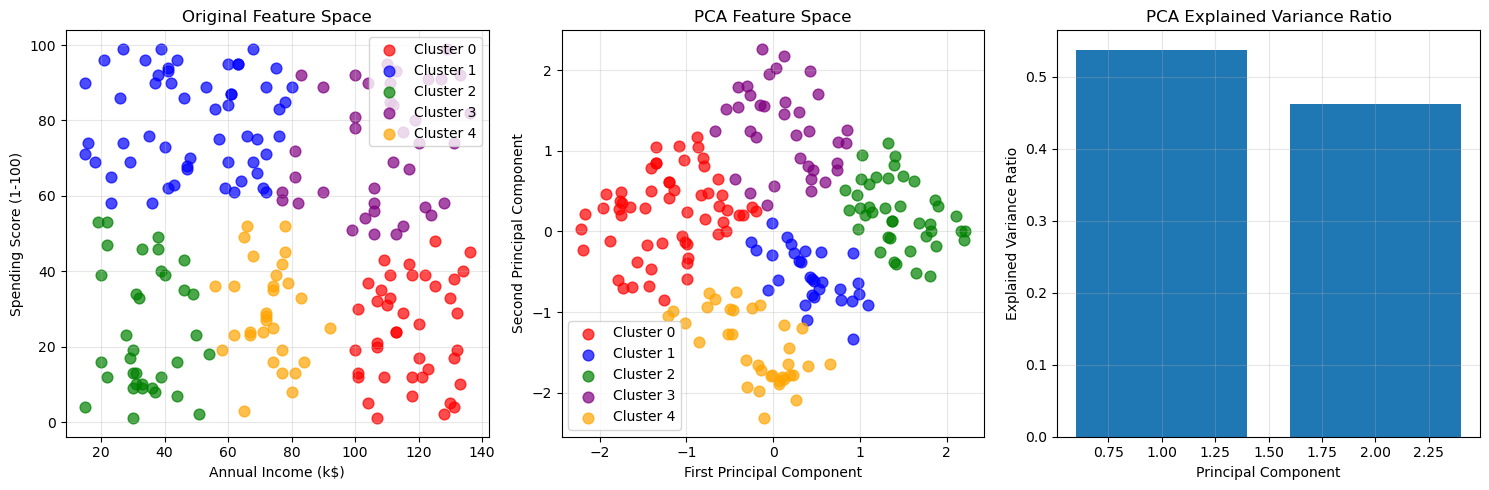


PCA Explained Variance Ratio: [0.53759673 0.46240327]
Total Variance Explained: 1.000


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Step 1: Create sample data (since Mall_Customers.csv might not be available)
# You can replace this with: data = pd.read_csv('Mall_Customers.csv')
np.random.seed(42)
n_customers = 200

data = pd.DataFrame({
    'CustomerID': range(1, n_customers + 1),
    'Gender': np.random.choice(['Male', 'Female'], n_customers),
    'Age': np.random.randint(18, 70, n_customers),
    'Annual Income (k$)': np.random.randint(15, 137, n_customers),
    'Spending Score (1-100)': np.random.randint(1, 100, n_customers)
})

# Step 2: Load and explore dataset
print("Dataset Shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nStatistical Summary:")
print(data.describe())

print("\nMissing Values:")
print(data.isnull().sum())

# Step 3: Initial data visualization
plt.figure(figsize=(15, 5))

# Subplot 1: Annual Income vs Spending Score
plt.subplot(1, 3, 1)
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], 
           alpha=0.7, c='blue', s=60)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True, alpha=0.3)

# Subplot 2: Age distribution
plt.subplot(1, 3, 2)
plt.hist(data['Age'], bins=20, color='green', alpha=0.7, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Subplot 3: Gender distribution
plt.subplot(1, 3, 3)
gender_counts = data['Gender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
        colors=['lightblue', 'lightpink'])
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()

# Step 4: Feature selection and preprocessing
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nFeatures selected for clustering:")
print(X.head())
print("\nFeature statistics after scaling:")
print(f"Mean: {X_scaled.mean(axis=0)}")
print(f"Standard deviation: {X_scaled.std(axis=0)}")

# Step 5: Elbow Method to find optimal K
wcss = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++', n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot Elbow Method
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='s', linewidth=2, markersize=8, color='red')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)

plt.tight_layout()
plt.show()

# Print silhouette scores
for k, score in zip(K_range, silhouette_scores):
    print(f"K={k}: Silhouette Score = {score:.3f}")

# Step 6: Apply K-Means clustering with optimal K
optimal_k = 5

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, init='k-means++', n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

data['Cluster'] = cluster_labels

cluster_centers_scaled = kmeans_final.cluster_centers_
cluster_centers = scaler.inverse_transform(cluster_centers_scaled)

print(f"\nClustering completed with K={optimal_k}")
print(f"Cluster centers (original scale):")
print(pd.DataFrame(cluster_centers, columns=X.columns))

print(f"\nCluster distribution:")
print(data['Cluster'].value_counts().sort_index())

# Step 7: Visualize clustering results
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], 
           alpha=0.7, c='gray', s=60)
plt.title('Original Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(optimal_k):
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], 
               c=colors[i], label=f'Cluster {i}', alpha=0.7, s=60)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], 
           c='black', marker='x', s=200, linewidths=3, label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
for i in range(optimal_k):
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data['Age'], cluster_data['Spending Score (1-100)'], 
               c=colors[i], label=f'Cluster {i}', alpha=0.7, s=60)
plt.title('Age vs Spending Score by Cluster')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 8: Evaluate clustering performance
final_silhouette_score = silhouette_score(X_scaled, cluster_labels)
print(f"\nFinal Silhouette Score: {final_silhouette_score:.3f}")

if final_silhouette_score > 0.5:
    print("Excellent clustering structure")
elif final_silhouette_score > 0.25:
    print("Good clustering structure")
else:
    print("Weak clustering structure")

# Analyze each cluster
print("\nCluster Analysis:")
for i in range(optimal_k):
    cluster_data = data[data['Cluster'] == i]
    print(f"\nCluster {i} ({len(cluster_data)} customers):")
    print(f"  Average Age: {cluster_data['Age'].mean():.1f}")
    print(f"  Average Annual Income: ${cluster_data['Annual Income (k$)'].mean():.1f}k")
    print(f"  Average Spending Score: {cluster_data['Spending Score (1-100)'].mean():.1f}")
    print(f"  Gender distribution: {cluster_data['Gender'].value_counts().to_dict()}")

# Step 9: Optional PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)
pca_labels = kmeans_pca.fit_predict(X_pca)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
for i in range(optimal_k):
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], 
               c=colors[i], label=f'Cluster {i}', alpha=0.7, s=60)
plt.title('Original Feature Space')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
for i in range(optimal_k):
    mask = pca_labels == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
               c=colors[i], label=f'Cluster {i}', alpha=0.7, s=60)
plt.title('PCA Feature Space')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.title('PCA Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nPCA Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Variance Explained: {sum(pca.explained_variance_ratio_):.3f}")
